In [7]:
ROOT = "/Users/adrianow/Documents/Google Drive/Mestrado/Tese/programacao/Tese/4-Resources" #mac
%matplotlib inline
#ROOT = "/media/adriano/Arquivos/Adriano/Google Drive/Mestrado/Tese/programacao/Tese/4-Resources" #linux
folder = ROOT

In [8]:
from os import path 
import traceback
import re
import json
import codecs

In [3]:
# mrc
# https://github.com/samzhang111/mrc-psycholinguistics.git

In [4]:
def print_error():
    formatted_lines = traceback.format_exc().splitlines()
    print formatted_lines[-3]
    print formatted_lines[-2]
    print formatted_lines[-1]

def save_dict_as_json(dic, file_name):
    with codecs.open(file_name, 'w','latin-1') as f:
        json.dump(dic, f,  encoding="latin-1", indent=2)

### opinion lexicons

In [31]:
def convert_bing(folder):
    """
    Will convert both Bing files to the accepted ones
    """
    # all info
    info = {}
    
    # will give a value of -1 for negative and +1 for positive
    pos = {}
    f = open(path.join(folder, "Bing", "positive-words.txt"))
    for k in f.read().split("\n")[35:-1]: pos[k] = 1 
        
    neg = {}
    f = open(path.join(folder, "Bing", "negative-words.txt"))
    for k in f.read().split("\n")[35:-1]: neg[k] = -1 
        
    # delete common keys
    common = set(neg.keys()).intersection(pos.keys())
    for k in common:
        del pos[k]
        del neg[k]

    # union the dicts
    pos.update(neg)
    
    return pos

bing = convert_bing(ROOT)


In [43]:
save_dict_as_json(bing, 'processed/bing.json')

In [6]:
#sentiwordnet está no ntlk


In [44]:
def convert_msol(folder):
    f = open(path.join(folder, "MSOL", "MSOL-June15-09.txt"))
    
    # for each of the terms, capture it and convert negative/positive to -1 or 1
    final = {}
    terms = f.read().split("\n")
    for term in terms[:-1]:
        key, sent = term.split(" ")

        # normalize the value
        if sent =="positive":
            final[key] = 1
        else:
            final[key] = -1
    
    return final
msol = convert_msol(ROOT)
save_dict_as_json(msol, 'processed/msol.json')

In [45]:
def convert_sentistrength(folder):
    # read the emoticons
    f = open(path.join(folder, "DataSentiStrength", "EmoticonLookupTable.txt"))
    info = {}
    for line in f.read().split("\r\n")[:-1]: 
        token, value = line.split("\t")
        info[token] = int(value)

    # read the emotions. Stems are represented with *: accep*
    f = open(path.join(folder, "DataSentiStrength", "EmotionLookupTable.txt"))
    for line in f.read().split("\r\n")[:-1]:
        vals = line.split("\t")
        info[vals[0]] = int(vals[1])
    
    return info

ss = convert_sentistrength(ROOT)
save_dict_as_json(ss, 'processed/sentstrengh.json')
print 'Total stems:', reduce(lambda a,b: a+b, map(lambda x: 1 if '*' in x else 0, ss.keys()))
print 'Total: ', len(ss)
ss

Total stems: 1379
Total:  2651


{'dissolution': -2,
 'desirable': 4,
 'prowl*': -2,
 'thirst': -2,
 'hating': -4,
 'party*': 1,
 'hate': -4,
 'hesita*': -1,
 'angraecum': 1,
 'upchuck': -2,
 'exaggerat*': -2,
 'unsteadiness': -2,
 'refrain*': -2,
 'immature': -2,
 'pride': 2,
 'beware': -2,
 'lure': -2,
 'void': -2,
 'lurk': -1,
 'supremo*': 1,
 'save*': 2,
 '<:}': 0,
 'frolic*': 4,
 'regret*': -2,
 'banish*': -2,
 'lovemak*': 4,
 'graced': 2,
 'compassion*': 2,
 'brutish': -2,
 'nullification*': -2,
 'stink*': -3,
 'deplorable': -2,
 'graces': 2,
 'force': -2,
 'tired': -2,
 'festiv*': 1,
 'rusty': -2,
 'usurp*': -2,
 'burgl*': -2,
 'rigorous': 1,
 'tragica* ': -2,
 'emptiness': -3,
 'cozi*': 2,
 'ultimatum*': -2,
 'decadence': -2,
 'ridicul*': -3,
 'dunderhead*': -2,
 'promis*': 2,
 'beaten': -1,
 'hazy': -2,
 'sunder': -2,
 'stinkhorn': 1,
 'controvers*': -2,
 'depreciate*': -2,
 'resignation*': -2,
 'dwindle*': -2,
 'wanton': -1,
 '(^ ^)': 1,
 'tenderis*': 1,
 'paining': -4,
 'doldrums': -2,
 'positivi*': 1,
 'sh

In [4]:
# NRC Hashtag base
# term, pmi score, # with pos, # with neg
# bigrams terms separated with space
# pairs terms separated by space, missing word represented by ---. ex it---happening
def convert_nrc_hashtag(folder):
    info = {}
    sent_map = {'positive': 1, 'negative': 0}
    try:
        # #fabulous	7.526	2301	2
        f = open(path.join(folder, "NRC-hashtag", "unigrams-pmilexicon.txt"))
        for line in f.read().split("\n")[:-1]: 
            token, value, pos, neg = line.split("\t")
            info[token] = float(value)

        # excellent	positive
        f = open(path.join(folder, "NRC-hashtag", "sentimenthashtags.txt"))
        for line in f.read().split("\n")[:-1]:
            vals = line.split("\t")
            info[vals[0]] = int(sent_map[vals[1]])

        # so---! #positive	5	29	0
        f = open(path.join(folder, "NRC-hashtag", "pairs-pmilexicon.txt"))
        for line in f.read().split("\n")[:-1]: 
            token, value, pos, neg  = line.split("\t")
            info[token] = float(value)

        # #wonderful #christmas	5	6	0
        f = open(path.join(folder, "NRC-hashtag", "bigrams-pmilexicon.txt"))
        for line in f.read().split("\n")[:-1]:
            vals = line.split("\t")
            info[vals[0]] = float(vals[1])
    
        return info

    except:
        print_error()
        print line
        
        return None
ss = convert_nrc_hashtag(ROOT)
save_dict_as_json(ss, 'processed/nrc_hash.json')
print 'Total: ', len(ss)
ss

Total:  679476


{'if you---have to': -0.732,
 'say say': -0.214,
 'ppl---ppl will': -4.999,
 'be---life': 5.0,
 'my mind---. .': -4.999,
 'quick clean': 0.478,
 'would favorite': 1.171,
 'wrist .': 0.413,
 "i '---its like": -4.999,
 'woods': 0.4,
 'point a': 0.19,
 'spiders': -0.72,
 'lil friend': 0.478,
 'woody': 1.266,
 'reel in': 0.478,
 'allow this': -4.999,
 'point i': -0.868,
 'going to---sit': 5.0,
 'i---the blessings': -4.999,
 'canes': 1.325,
 'all was': -0.62,
 'no---you don': -4.999,
 'high schoolers': -0.774,
 'gac': 1.171,
 'changes in': 1.325,
 'don---able to': -4.999,
 'whoever---can': 0.008,
 'hoodie so': 0.478,
 "it '---#beauty": 5.0,
 '! lov': 1.171,
 '( the': 0.11,
 'people---opinion': -4.999,
 '#great #community': 5.0,
 '@crookedintriago': 0.883,
 'reading---reading a': 0.746,
 '@russelelliot': 0.478,
 'when---out to': -0.502,
 'lahat .': -0.214,
 'so the---are': 0.043,
 'shite on': -2.006,
 'looking at---never': -4.999,
 '3 time': 0.072,
 'point ?': -2.06,
 '10 and': 0.57,
 "ha---

In [9]:
for k in ss.keys():
    if '---' in k:
        print k

if you---have to
ppl---ppl will
be---life
my mind---. .
i '---its like
going to---sit
i---the blessings
no---you don
don---able to
whoever---can
it '---#beauty
people---opinion
reading---reading a
when---out to
so the---are
looking at---never
ha---i '
being---probably
my---bed #ill
people---doesn '
decided to---with
i---m gone
sick---sick to
i have---ready
as---mum
this---money
laying on---#perfect
we---no one
i---done today
really don---' s
really don---' t
i '---#rotten
what---wouldn '
no matter---smile
i feel---#wonderful
feels---there
just---mood
uh oh---uh
making---someone
life---us and
did i---s
even---we
its funny---' t
did i---t
where---this misconception
did i---i
why would---in a
is---to do
haha---two
went to---in a
what---tampon
yea---just
just---back of
i '---called
so sad---#pathetic
i---am wide
someone---me
it---to win
i wonder---wonder who
way---us
i '---never going
you---bout
never---again will
someone---my
nothing like---after
i---in men
holy---! i
this weekend---weeke

In [47]:
def convert_nrc_sentiment140(folder):
    info = {}
    try:
        # #fabulous	7.526	2301	2
        f = open(path.join(folder, "NRC-Sentiment140", "unigrams-pmilexicon.txt"))
        for line in f.read().split("\n")[:-1]: 
            token, value, pos, neg = line.split("\t")
            info[token] = float(value)

        # so---! #positive	5	29	0
        f = open(path.join(folder, "NRC-Sentiment140", "pairs-pmilexicon.txt"))
        for line in f.read().split("\n")[:-1]: 
            token, value, pos, neg  = line.split("\t")
            info[token] = float(value)

        # #wonderful #christmas	5	6	0
        f = open(path.join(folder, "NRC-Sentiment140", "bigrams-pmilexicon.txt"))
        for line in f.read().split("\n")[:-1]:
            vals = line.split("\t")
            info[vals[0]] = float(vals[1])
    
        return info

    except:
        print_error()
        print line
        
        return None
ss = convert_nrc_sentiment140(ROOT)
save_dict_as_json(ss, 'processed/sent140.json')
print 'Total: ', len(ss)
ss

Total:  1220176


{'mood swings---swings': 5.0,
 'if you---have to': 0.231,
 "haven't blocked": 0.742,
 'have---to learn': -4.999,
 'science---science revision': -4.999,
 'just---, like': -0.287,
 'shall need': 0.049,
 'point x': 0.742,
 'finally---alone': -4.999,
 'right nowww': -0.579,
 'no---a whole': -4.999,
 'mmm---delicious': 5.0,
 'say say': 1.658,
 'point a': 0.049,
 'spiders': -0.79,
 'my---.... so': -1.454,
 '@teenhearts': 1.995,
 'my ear---it': -4.999,
 'listening to---ready to': 5.0,
 'allow this': 0.742,
 'point i': -0.551,
 'incredible ...': 1.348,
 'is thinking---good': 5.0,
 'cpt sembuh': -1.049,
 'concert ..': -0.389,
 'why using': 0.742,
 'well---reading': 0.336,
 'missin me': -0.643,
 '1st concert': 1.84,
 'through really': -0.643,
 "why can't---sleep ?": -4.999,
 'downtown @': 1.147,
 'had hbo': -4.999,
 'rickman': -0.173,
 '@imwendy i': -0.238,
 'worship was': 5.0,
 'reading---reading a': 0.677,
 'i love---me smile': 5.0,
 'got vids': 0.049,
 'goose egg': -0.238,
 'to wish': 0.459,


In [27]:
import codecs
def convert_ts_lex(folder):
    """
    Converts ts lex to the dictionary
    """
    #example of a line :)	1.000000
    info = {}
    try:
        with open(path.join(folder, "TS-Lex", "neg.txt")) as f:
            for line in f.read().split("\r\n"):
                if line:
                    vals = line.split("\t")
                    info[" ".join(vals[0:-1])] = float(vals[-1])
                
        with codecs.open(path.join(folder, "TS-Lex", "pos.txt"), 'r', 'unicode-escape') as f:
            for line in f.read().split("\r\n"):
                if line:
                    vals = line.split("\t")
                    info[u" ".join(vals[0:-1])] = float(vals[-1])
                
        return info
    except:
        print_error()
        print line
        
        return None
ss = convert_ts_lex(ROOT)
save_dict_as_json(ss, 'processed/ts_lex.json')
print 'Total: ', len(ss)
ss

Total:  347447


{u"wouldn't be so": 0.602843,
 u'will give it to': 0.880692,
 "no i'm not ,": -0.502828,
 u':) miss you guys': 0.967621,
 u'think x': 0.941717,
 "no i'm not !": -0.602658,
 u'birthday !! have an': 0.999995,
 'me so :(': -0.973999,
 u'!! all the best': 0.991296,
 "can't watch the twitcam": -0.928566,
 u'({})""': 0.656578,
 'wannaaaa': -0.908153,
 'spiders': -0.930731,
 u'#musicnews': 0.987038,
 u'woody': 0.808022,
 'nights :-(': -0.997944,
 ':( next year': -0.786357,
 u'please :( 17': 0.700691,
 'cuddle with me :(': -0.999322,
 'cramps are killing me': -0.99965,
 "won't be making it": -0.905695,
 'canes': -0.591879,
 'have to use my': -0.777367,
 u'it absolutely': 0.60477,
 u'happy palm sunday': 0.994137,
 u'seeing you ! :)': 0.968351,
 u':) with and': 0.550596,
 'feelings ?': -0.960913,
 u'#yummy :)': 0.852178,
 u'hope so because': 0.642919,
 u'you ! miss': 0.996504,
 'miss seeing you everyday': -0.909407,
 'feelings !': -0.955745,
 u"! it's nice to": 0.944892,
 'as i thought': -0.9624

In [7]:
def convert_mpqa(folder):
    """
    Convert MPQA files to a standard dictionary
    """
    # one line of mpqa
    # type=strongsubj len=1 word1=abidance pos1=adj stemmed1=n priorpolarity=positive
    info = {}
    TYPE = 0 
    TOKEN = 2
    VALUE = 5
    sent_map = {'positive': 1, 'negative': -1, 'neutral': 0, 'both':0 }
    token = re.compile('word1=(\w+)')
    pos = re.compile('priorpolarity=(negative|positive|both|neutral)')
    pos1 = re.compile('polarity=(negative|positive|both|neutral)')
    
    try:
        with open(path.join(folder, "MPQA", "subjclueslen1-HLTEMNLP05.tff")) as f:
            for line in f.read().split("\n"):
                if line:
                    tkn = token.findall(line)[0]
                    val = pos.findall(line)
                    if not val:
                        val = pos1.findall(line)
                    info[tkn] = sent_map[val[0]]
        return info
    except:
        print_error()
        print line

        return None
ss = convert_mpqa(ROOT)
save_dict_as_json(ss, 'processed/mpqa.json')
print 'Total: ', len(ss)
ss    

Total:  6778


{'fawn': 0,
 'foul': -1,
 'mirage': -1,
 'aggression': -1,
 'eligible': 1,
 'chatter': -1,
 'scold': -1,
 'originality': 1,
 'superficially': -1,
 'outwit': 1,
 'lorn': -1,
 'sputter': -1,
 'immature': -1,
 'sinking': -1,
 'slothful': -1,
 'befoul': -1,
 'tantalizing': 1,
 'needfully': 0,
 'screaming': 0,
 'disturb': -1,
 'prize': 1,
 'brutish': -1,
 'stereotypical': -1,
 'steadfastness': 1,
 'straight': 1,
 'inevitably': -1,
 'elegant': 1,
 'second': -1,
 'valiant': 1,
 'loathing': -1,
 'haughtily': -1,
 'hilariously': 1,
 'ruthless': -1,
 'decry': -1,
 'resilient': 1,
 'increasing': 0,
 'succumb': -1,
 'insinuation': -1,
 'hero': 1,
 'jubilantly': 1,
 'unseemly': -1,
 'fissures': -1,
 'shriek': -1,
 'bullyingly': -1,
 'doldrums': -1,
 'revengefully': -1,
 'uplifting': 1,
 'unwillingness': -1,
 'elaborate': 0,
 'unfriendly': -1,
 'controversy': -1,
 'unwanted': -1,
 'spotty': -1,
 'criticism': -1,
 'golden': 1,
 'divide': -1,
 'mawkishness': -1,
 'stern': -1,
 'scarier': -1,
 'catchy'

### Emotionals lexicons

In [50]:
def convert_anew(folder):
    VALENCE = 2
    WRD = 0
    info = {}
    try:
        with open(path.join(folder, "ANEW", "all.csv")) as f:
            f.readline()
            for line in f.read().split("\r\n"):
                if line:
                    vals = line.split(",")
                    info[vals[WRD]] = float(vals[VALENCE])

        with open(path.join(folder, "ANEW", "male.csv")) as f:
            f.readline()
            for line in f.read().split("\r\n"):
                if line:
                    vals = line.split(",")
                    info[vals[WRD]] = float(vals[VALENCE])

        with open(path.join(folder, "ANEW", "female.csv")) as f:
            f.readline()
            for line in f.read().split("\r\n"):
                if line:
                    vals = line.split(",")
                    info[vals[WRD]] = float(vals[VALENCE])

        return info
    except:
        print_error()
        print line

ss = convert_anew(ROOT)
save_dict_as_json(ss, 'processed/anew.json')
print 'Total: ', len(ss)
ss    

Total:  1034


{'pervert': 2.08,
 'savior': 7.72,
 'green': 6.48,
 'allergy': 2.95,
 'dollar': 7.74,
 'yellow': 5.58,
 'narcotic': 4.09,
 'alien': 4.75,
 'baby': 8.65,
 'thoughtful': 7.85,
 'nursery': 6.31,
 'sleep': 7.03,
 'infatuation': 6.5,
 'grateful': 7.39,
 'messy': 3.16,
 'gossip': 3.23,
 'chair': 5.0,
 'golfer': 5.46,
 'hate': 1.79,
 'milk': 5.45,
 'seasick': 1.96,
 'dreadful': 2.19,
 'suicide': 1.0,
 'cliff': 4.38,
 'gymnast': 6.27,
 'tidy': 6.32,
 'father': 7.26,
 'young': 7.0,
 'passage': 5.12,
 'robber': 2.18,
 'trauma': 1.77,
 'immature': 2.65,
 'pride': 7.22,
 'friendly': 8.5,
 'abundance': 6.55,
 'woman': 6.95,
 'street': 5.19,
 'rescue': 7.5,
 'torture': 1.58,
 'song': 7.85,
 'horror': 2.48,
 'carefree': 7.45,
 'fat': 1.75,
 'cyclone': 3.0,
 'leisurely': 7.0,
 'masturbate': 4.35,
 'kitten': 7.0,
 'abduction': 2.33,
 'fur': 4.0,
 'trouble': 2.65,
 'month': 5.07,
 'feeble': 3.04,
 'elated': 7.43,
 'disturb': 3.65,
 'heaven': 7.41,
 'clouds': 5.96,
 'nectar': 6.96,
 'stiff': 4.29,
 'pinc

In [14]:
# execute mysql
from subprocess import call
call(["ls", "-l"])

0

In [9]:
# wordnet affect
# xml que nao tem positivo e negativo mas sim as emocoes.
# poderiam ter colunas com cada um dos sentimentos??
import xml.etree.ElementTree as ET
tree = ET.parse('./WNA/a-hierarchy.xml')
root = tree.getroot()
import networkx as nx
G = nx.DiGraph()
G.add_node('root')

In [16]:
for child in root:
    # get the node and edge
    parent = child.get('isa')
    node = child.get('name')
    
    if node==None or parent==None:
        continue
    
    # add to the graph
    #G.add_node(node)
    print parent,node
    G.add_weighted_edges_from([(parent, node,1)])
# read G.nodes()

root mental-state
root physical-state
root behaviour
root situation
root signal
root trait
root sensation
mental-state cognitive-state
mental-state affective-state
mental-state cognitive-affective-state
affective-state mood
affective-state emotion
situation emotion-eliciting-situation
signal edonic-signal
emotion positive-emotion
emotion negative-emotion
emotion neutral-emotion
emotion ambiguous-emotion
positive-emotion joy
positive-emotion love
positive-emotion affection
positive-emotion liking
positive-emotion enthusiasm
positive-emotion gratitude
positive-emotion self-pride
positive-emotion levity
positive-emotion calmness
positive-emotion fearlessness
positive-emotion positive-expectation
positive-emotion positive-fear
positive-emotion positive-hope
joy amusement
joy elation
joy exultation
joy exhilaration
joy exuberance
joy happiness
joy bonheur
joy gladness
joy merriment
joy rejoicing
joy belonging
joy cheerfulness
joy contentment
elation euphoria
exultation triumph
exhilaration 

In [17]:
G.predecessors("sympathy")

[]

In [18]:
# run the srun.sh script on the prompt
#./xampp start
#mkdir /var/run/mysqld/
#ln -s /opt/lampp/var/mysql/mysql.sock /var/run/mysqld/mysqld.sock
# sudo /opt/lampp/run.sh


In [19]:
# use pandas to get the english lemmas
import pandas as pd
import MySQLdb

# connect
db = MySQLdb.connect(host="localhost", user="root", passwd="",
db="WNA")

df = pd.read_sql('SELECT * FROM english_lemma', db)
df = df.set_index(["id"])

In [20]:
# read the words
tree = ET.parse('./WNA/a-synsets.xml')
root = tree.getroot()
synlist = list(root)

words = {}
sentiments = {}
nouns = []

# iterate over nouns
for child in synlist[0]:
    # get the node and edge
    categ = child.get('categ')
    id = child.get('id')
    
    # create the index of ids and to be fetched later with the sentiments
    sentiments[id] = categ
    nouns.append(categ)
    
# iterate over adjetives, adverbs, etc
for i in range(1,4):
    for child in synlist[i]:
        # get the node and edge
        noun = child.get('noun-id')
        id = child.get('id')

        # get the associated word that has sentiment associated with
        if type(df.loc[id].lemma) == str:
            # just one lemma
            words[df.loc[id].lemma] = sentiments[noun]
        else:
            # more than one lemma
            for row in df.loc[id].lemma:
                words[row] = sentiments[noun]

#words
#G.predecessors("stupefaction")

In [21]:
def get_associated_sentiment(word):
    """
    Deals with more than one sentiment associated.
    Ex: 
    """
    try:
        return G.predecessors(word)
    except:
        print_error()
        print "WNA: the associated word is not found in the noun list:", word
        return None

            
def get_sentiment(word):
    # will return a dict with the 2 mains sentiment associated with the word
    sent = []
    d = {}
 
    sentiment = get_associated_sentiment(word)
    
    # check if sentiment not found. if 2 sentiments try them individually
    if not sentiment and "-" in word:
        print word, sentiment
        for s in word.split("-"):
            # get new sentiment
            d.update(get_sentiment(s))
    else:
        while sentiment and sentiment[0] != 'root':
            sent.append(sentiment[0])

            # get new sentiment
            sentiment = get_associated_sentiment(sentiment[0])              

        # create the dictionary
        for s in sent:
            d[s] = 1
    return d
    
# associate the words with the emotions
wna = {}
for k, wi in words.iteritems():
    wna[k] =  get_sentiment(wi)

for n in nouns:
    wna[n] = get_sentiment(n)
    

  File "/usr/lib/python2.7/dist-packages/networkx/classes/digraph.py", line 672, in predecessors_iter
    raise NetworkXError("The node %s is not in the digraph."%(n,))
NetworkXError: The node levity-gaiety is not in the digraph.
WNA: the associated word is not found in the noun list: levity-gaiety
levity-gaiety None
  File "/usr/lib/python2.7/dist-packages/networkx/classes/digraph.py", line 672, in predecessors_iter
    raise NetworkXError("The node %s is not in the digraph."%(n,))
NetworkXError: The node gaiety is not in the digraph.
WNA: the associated word is not found in the noun list: gaiety
  File "/usr/lib/python2.7/dist-packages/networkx/classes/digraph.py", line 672, in predecessors_iter
    raise NetworkXError("The node %s is not in the digraph."%(n,))
NetworkXError: The node levity-gaiety is not in the digraph.
WNA: the associated word is not found in the noun list: levity-gaiety
levity-gaiety None
  File "/usr/lib/python2.7/dist-packages/networkx/classes/digraph.py", line 

In [51]:
save_dict_as_json(wna, 'processed/wna.json')

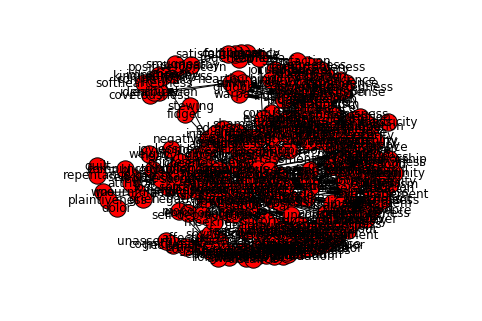

In [23]:
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()

In [52]:
import codecs

def convert_dal(folder):
    """
    Get DAL information and return a dictionary of dictionaries with
    
    
    """
    ret = {}
    reg_ex = re.compile("([\w'-�&]*) *([\d\.]*) *([\d\.]*) *([\d\.]*)")
    reg_strange = re.compile("�")
    # read the words and create the return diciontary
    with codecs.open(path.join(folder, "DAL", "dictionary_English.txt"), 'r', 'ISO-8859-2') as f:
        # skip the header
        for i in range(39):
            f.readline()

        # get the vals using regular expression
        for line in f.read().split("\r\n"):
            vals = reg_ex.search(line).groups()

            # save if a word is found
            if vals[0] != '':
                key = vals[0]
                if reg_strange.search(key):
                    key = key.replace("�", "'")
                ret[key] = {'pleasantness':float(vals[1]), \
                                'activation':  float(vals[2]), \
                                'imagery':     float(vals[3])}

    # read english words. Add the new words only
    with codecs.open(path.join(folder, "DAL", "dictionary_UK English.txt"), 'r', 'ISO-8859-2') as f:
        # skip the header
        for i in range(39):
            f.readline()

        # get the vals using regular expression
        for line in f.read().split("\r\n"):
            vals = reg_ex.search(line).groups()

            # save if a word is found
            if vals[0] != '' and not vals[0] in ret.keys():
                key = vals[0]
                if reg_strange.search(key):
                    key = key.replace("�", "'")
                ret[key] = {'pleasantness':float(vals[1]), \
                                'activation':  float(vals[2]), \
                                'imagery':     float(vals[3])}

    return ret

dal = convert_dal(ROOT)
save_dict_as_json(dal, 'processed/dal.json')

### SenticNet

In [89]:
import xml.etree.ElementTree as ET

def process_sentic_net(folder):
    """
    Process the senticnet file, given the root folder as input
    """
    def get_synset_info(syn):
        """
        Get only the important tags and the synset name
        """
        final_dict = {}
        tmp_dict = {}
        syn_name = None
        keys = set(['aptitude','attention','pleasantness','polarity'])
        for e in list(syn):
            key = e.tag.replace('{http://sentic.net/api}', '')
            if key in keys:
                tmp_dict[key] = float(e.text)
            elif key=='text':
                syn_name = e.text
        final_dict[syn_name] = tmp_dict
        return final_dict

    # read the file
    tree = ET.parse(path.join(folder, "SenticNet", "senticnet3.rdf.xml"))
    root = tree.getroot()
    synlist = list(root)

    synsets = {}
    for syn in synlist:
        synsets.update(get_synset_info(syn))
    return synsets

senticnet = process_sentic_net(ROOT)
save_dict_as_json(senticnet, 'processed/senticnet.json')

### NRC Emolex

In [99]:
def convert_emolex(folder):
    """
    Convert the NRC emotion lexicon to a json file
    """
    ret = {}
    try:
        lines = None
        with open(path.join(folder, "NRC-Emotion", "lexicon-wordlevel-alphabetized-v0.92.txt")) as f:
            lines = f.readlines()
            
        # the first 46 lines do not have info, just describe the files
        lines = lines[46:]
            
        # for each of the lines check get the word, sentiment, value triplet
        for line in lines:
            word, sent, val = line.strip().split('\t')
            tmp_dic = ret.get(word, {})
            tmp_dic[sent] = int(val)
            ret[word] = tmp_dic
    except:
        print_error()
    return ret
emolex = convert_emolex(ROOT)  
save_dict_as_json(emolex, 'processed/emolex.json')

### SentiSense


In [5]:
from nltk.corpus import wordnet as wn

# get a dictionary with all the ids
syns = list(wn.all_synsets())
offsets_list = [(s.offset(), s) for s in syns]
offsets_dict = dict(offsets_list)

offsets_dict[203866]

Synset('worsen.v.01')

In [10]:
def convert_sentisense(folder):
    """
    Convert the Sentisense lexicon to a json file
    """
    def get_word(synset):
        lemma = synset.lemma_names()
        if len(lemma)>1:
            print 'more than one', synset, lemma
        else:
            return lemma[0]

    ret = {}
    # read the file
    tree = ET.parse(path.join(folder, "SentiSense_English_WordNet_3.0", "SentiSense_Synsets_EN_30.xml"))
    root = tree.getroot()
    
    # for each of the XML node, get the words associated
    for concept in list(root):
        # get the synset id
        syn = int(concept.get('synset').split('-')[1])
        syn_pos = concept.get('synset').split('-')[2]
        word,pos,_ = offsets_dict[syn].name().split('.')
        lemma = '.'.join([word,pos])
        if lemma== word+'.'+syn_pos:
            ret[lemma] = {concept.get('emotion'): 1}
        
    return ret
sentis = convert_sentisense(ROOT)
save_dict_as_json(sentis, 'processed/sentisense.json')

### LEW

In [60]:
# installed brew install mdbtools
# how to https://www.vivaolinux.com.br/artigo/Utilizando-arquivos-Access-(.mdb)-no-seu-Linux 
# mdb-export LEW.mdb PalEmoED > PalEmoED.csv
# mdb-export LEW.mdb PalEmoDE > PalEmodE.csv
import pandas as pd
ec = pd.read_csv('LEW/PalEmoEC.csv')
print ec.shape
ec.head()

(1448, 192)


Palabra     Tag  boredom  happiness  relief  love  anguish  anxiety  \
0     year    NOUN      1.0        3.0     1.0   0.0      1.0      0.0   
1      ago  ADVERB      0.0        0.0     0.0   0.0      0.0      0.0   
2     live    VERB      0.0        5.0     1.0   1.0      0.0      0.0   
3  emperor    NOUN      0.0        2.0     0.0   0.0      0.0      0.0   
4  thought    VERB      0.0        2.0     0.0   0.0      0.0      0.0   

   longing  apathy        ...         braveryMean  embarrassmentMean  \
0      0.0     0.0        ...                 0.0                0.0   
1      0.0     0.0        ...                 0.0                0.0   
2      0.0     0.0        ...                 0.0                0.0   
3      0.0     0.0        ...                 0.0                0.0   
4      0.0     0.0        ...                 0.0                0.0   

   worryMean  fullness  fullnessMean  unwillingly  unwillinglyMean  affection  \
0        0.0         0             0            0                0          0   
1        0.0         0             0            0                0          0   
2        0.0         0             0            0                0          0   
3        0.0         0             0            0                0          0   
4        0.0         0             0            0                0          0   

   affectionMean          Palabras  
0              0             years  
1              0               ago  
2              0             lived  
3              0  emperor,emperors  
4              0           thought  

[5 rows x 192 columns]

In [61]:
ed = pd.read_csv('LEW/PalEmoED.csv')
print ed.shape
ed.Tag.unique()

(1736, 10)


array(['NOUN', 'VERB', 'ADJECTIVE', 'ADVERB'], dtype=object)

In [187]:
def convert_lew(folder):
    tmp = {}
    ed = pd.read_csv(path.join(folder, "LEW", "PalEmoED.csv"))
    for row in ed.iterrows():
        info = row[1]
        tmp[info.Palabra+'#'+info.Tag] = {
            'Activation': info.MeanAct,
            'Evaluation': info.MeanEval,
            'Power': info.MeanCon,
        }
    return tmp
lew = convert_lew(ROOT)
save_dict_as_json(lew, 'processed/lew.json')

In [171]:
import pyodbc
from meza import io

In [185]:
def convert_lew_emotions(folder):
    def convert(x):
        try:
            return float(x)
        except:
            return x

    def create_dict(row):
        t = row.copy()
        del(t['Palabra'])
        del(t['Palabras'])
        del(t['Tag'])
        return t.to_dict()

    d = {}
    ed = path.join(folder, "LEW", "LEW.mdb")
    records = io.read(ed)

    # get all the records and insert into a dictionary
    for r in records:
        for k,v in r.iteritems():
            t = d.get(k, [])
            t.append(v)
            d[k] = t

    # create a pandas df and transform the numbers in float
    df = pd.DataFrame(d)
    df = pd.DataFrame(df.applymap(convert))

    # create a json with all the information
    ret = {}
    for row in df.iterrows():
        t = row[1]
        palabra = t['Palabra']
        k = '{}#{}'.format(palabra,t['Tag'])
        ret[k] = create_dict(t)

        # create aditonal for plural words
        for p in t['Palabras'].split(','):
            if palabra==p:
                continue
            k = '{}#{}'.format(p,t['Tag'])
            ret[p] = create_dict(t)

    return ret
lew_emo = convert_lew_emotions(ROOT)
save_dict_as_json(lew_emo, 'processed/lew_emo.json')


### EmosenticNet

In [5]:
def convert_emosenticnet(folder):
    tmp = {}
    with open(path.join(folder, "EmoSenticNet", "emosenticnet.csv")) as f:
        lines = f.readlines()[0].split('\r')
    cols = lines[0].split(';')
    for line in lines[1:]:
        info = line.split(';')
        wd = {}
        for i, col in enumerate(cols[1:]):
            wd[col] = int(info[1+i])
        tmp[info[0]] = wd
    return tmp
emosnet = convert_emosenticnet(ROOT)
save_dict_as_json(emosnet, 'processed/emosnet.json')